# Chapter 4: Statistical Inference for the Mean

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="../images/ch04_visual_summary.jpg" alt="Chapter 04 Visual Summary" width="65%">

This notebook provides an interactive introduction to statistical inference, teaching you how to extrapolate from sample statistics to population parameters using confidence intervals and hypothesis tests.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch04_Statistical_Inference_for_the_Mean.ipynb)

## Chapter Overview

**Statistical inference** allows us to extrapolate from what we observe in a sample to make statements about the unobserved population. This chapter focuses on inference for the **population mean** μ.

**Central Question:** Given a sample mean $\bar{x}$, what can we say about the population mean μ?

**Two Main Tools:**
1. **Confidence intervals**: Give a range of plausible values for μ
2. **Hypothesis tests**: Determine whether a specific claimed value of μ is plausible

**What you'll learn:**
- Understand the t-distribution and when to use it (vs normal distribution)
- Construct confidence intervals for the population mean
- Conduct two-sided hypothesis tests (H₀: μ = μ* vs Hₐ: μ ≠ μ*)
- Conduct one-sided hypothesis tests (directional alternatives)
- Interpret p-values and critical values
- Apply inference to proportions data

**Datasets used:**
- **AED_EARNINGS.DTA**: Annual earnings for 171 women (primary example)
- **AED_GASPRICE.DTA**: Gasoline prices in Yolo County, CA (32 stations)
- **AED_EARNINGSMALE.DTA**: Annual earnings for 191 men aged 30
- **AED_REALGDPPC.DTA**: U.S. real GDP per capita growth rates

**Chapter outline:**
1. Example: Mean Annual Earnings
2. t Statistic and t Distribution  
3. Confidence Intervals
4. Two-Sided Hypothesis Tests
5. Hypothesis Test Examples
6. One-Sided Directional Hypothesis Tests
7. Generalizations
8. Proportions Data

## 🔧 Setup

Run this cell first to import all required packages and configure the environment.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 4.1 Example: Mean Annual Earnings

We'll use a motivating example throughout this chapter: estimating the **population mean annual earnings** for 30-year-old female full-time workers in the U.S. in 2010.

**The Problem:**
- We have a **sample** of 171 women
- We want to make inferences about the **population** of all such women

**Key Statistics:**
- **Sample mean** $\bar{x}$: Our point estimate of population mean μ
- **Standard deviation** s: Measures variability in the sample
- **Standard error** se($\bar{x}$) = s/√n: Measures precision of $\bar{x}$ as an estimate of μ

The **standard error** is crucial—it quantifies our uncertainty about μ. Smaller standard errors mean more precise estimates.

In [2]:
# Load earnings data
data_earnings = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGS.DTA')
earnings = data_earnings['earnings']

# Calculate key statistics
n = len(earnings)
mean_earnings = earnings.mean()
std_earnings = earnings.std(ddof=1)  # ddof=1 for sample std dev
se_earnings = std_earnings / np.sqrt(n)  # Standard error

print("=" * 70)
print("SAMPLE STATISTICS FOR ANNUAL EARNINGS")
print("=" * 70)
print(f"Sample size (n):        {n}")
print(f"Mean:                   ${mean_earnings:,.2f}")
print(f"Standard deviation:     ${std_earnings:,.2f}")
print(f"Standard error:         ${se_earnings:,.2f}")
print(f"\nInterpretation: Our best estimate of population mean earnings is ${mean_earnings:,.2f}")
print(f"The standard error of ${se_earnings:,.2f} measures the precision of this estimate.")

SAMPLE STATISTICS FOR ANNUAL EARNINGS
Sample size (n):        171
Mean:                   $41,412.69
Standard deviation:     $25,527.05
Standard error:         $1,952.10

Interpretation: Our best estimate of population mean earnings is $41,412.69
The standard error of $1,952.10 measures the precision of this estimate.


## Interpreting the Standard Error

**Key Statistics from our Sample (n = 171 women):**
- Sample mean: $41,412.69
- Standard deviation: $25,527.05
- Standard error: $1,952.10

**What is the standard error telling us?**

The standard error of $1,952.10 measures the **precision** of our sample mean as an estimate of the true population mean. Think of it as quantifying our uncertainty.

**Statistical interpretation:**
- If we repeatedly drew samples of 171 women, the sample means would vary
- The standard error tells us the typical amount by which sample means differ from the true population mean
- Formula: SE = s/√n = $25,527.05/√171 = $1,952.10

**Why is the SE much smaller than the standard deviation?**
- Standard deviation ($25,527) measures variability among individual women's earnings
- Standard error ($1,952) measures variability of the sample mean across different samples
- The larger the sample size, the smaller the SE → more precise estimates

**Practical insight:**
- A standard error of $1,952 is relatively small compared to the mean ($41,413)
- This suggests our estimate is reasonably precise
- If we had only 43 women (n=43), SE would double to $3,904 (less precise)
- With 684 women (n=684), SE would halve to $976 (more precise)

## 4.2 t Statistic and t Distribution

For inference on the population mean μ, we use the **t-statistic**:

$$t = \frac{\bar{x} - \mu}{\text{se}(\bar{x})} = \frac{\bar{x} - \mu}{s / \sqrt{n}}$$

Under certain assumptions, this statistic follows a **t-distribution** with (n - 1) degrees of freedom:

$$t \sim T(n-1)$$

**Why t-distribution instead of normal?**
- We don't know the population standard deviation σ, so we estimate it with sample std dev s
- This adds uncertainty, making the distribution have **fatter tails** than the normal
- As sample size increases (n → ∞), the t-distribution approaches the standard normal distribution

**Key properties:**
- Symmetric around zero (like the normal)
- Fatter tails than normal (more probability in extremes)
- Converges to N(0,1) as degrees of freedom increase

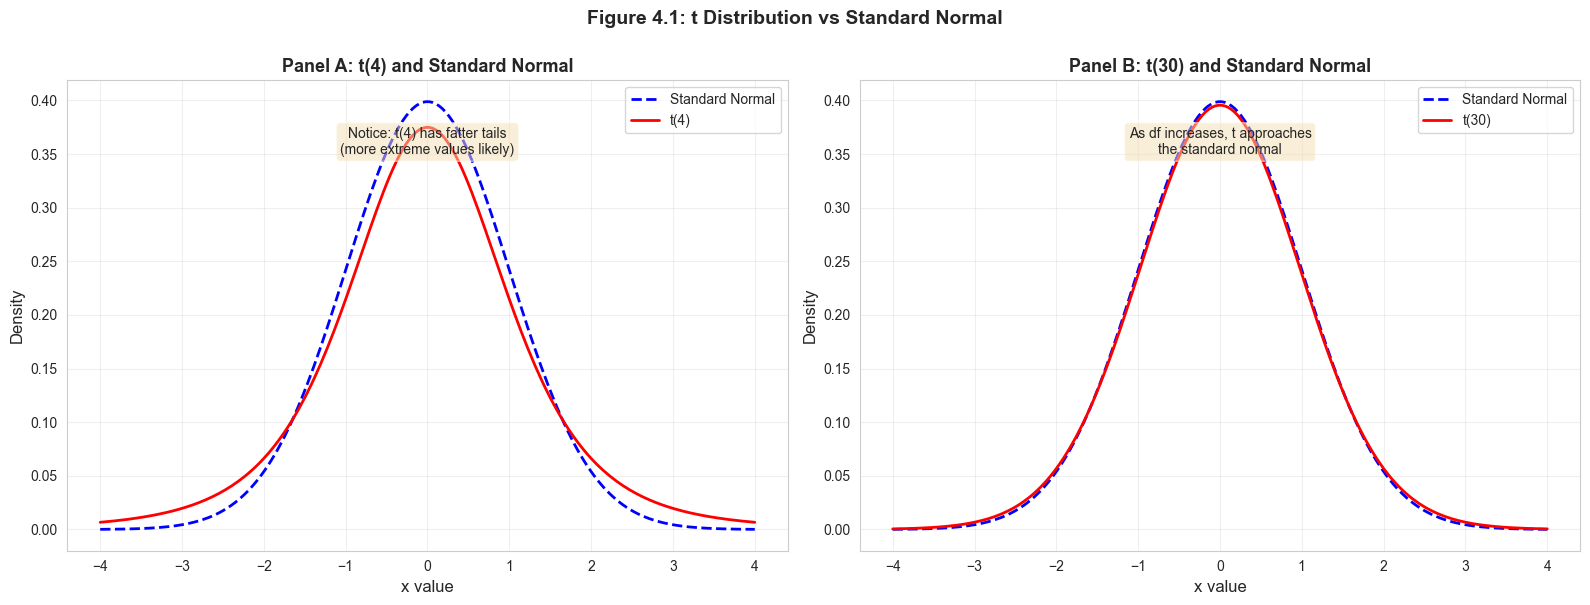


📊 Key Observation:
   With more degrees of freedom (larger n), the t-distribution looks more like the normal.
   For n > 30, they're nearly identical.


In [3]:
# Visualize t-distribution vs standard normal
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.linspace(-4, 4, 200)

# Panel A: t(4) vs standard normal
axes[0].plot(x, stats.norm.pdf(x), 'b--', linewidth=2, label='Standard Normal')
axes[0].plot(x, stats.t.pdf(x, df=4), 'r-', linewidth=2, label='t(4)')
axes[0].set_xlabel('x value', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Panel A: t(4) and Standard Normal', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0, 0.35, 'Notice: t(4) has fatter tails\n(more extreme values likely)', 
             ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Panel B: t(30) vs standard normal
axes[1].plot(x, stats.norm.pdf(x), 'b--', linewidth=2, label='Standard Normal')
axes[1].plot(x, stats.t.pdf(x, df=30), 'r-', linewidth=2, label='t(30)')
axes[1].set_xlabel('x value', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Panel B: t(30) and Standard Normal', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].text(0, 0.35, 'As df increases, t approaches\nthe standard normal', 
             ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Figure 4.1: t Distribution vs Standard Normal',
             fontsize=14, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

print("\n📊 Key Observation:")
print("   With more degrees of freedom (larger n), the t-distribution looks more like the normal.")
print("   For n > 30, they're nearly identical.")

## 4.3 Confidence Intervals

A **confidence interval** provides a range of plausible values for the population parameter μ.

**General formula:**
$$\text{estimate} \pm \text{critical value} \times \text{standard error}$$

For the population mean, a **100(1 - α)% confidence interval** is:
$$\bar{x} \pm t_{n-1, \alpha/2} \times \text{se}(\bar{x})$$

Where:
- $\bar{x}$ = sample mean (our estimate)
- $t_{n-1, \alpha/2}$ = critical value from t-distribution with (n-1) degrees of freedom
- se($\bar{x}$) = s/√n = standard error
- α = significance level (e.g., 0.05 for 95% confidence)

**Interpretation:** If we repeatedly drew samples and constructed 95% CIs, about 95% of those intervals would contain the true population mean μ.

**Practical interpretation:** We are "95% confident" that μ lies within this interval.

**Rule of thumb:** For n > 30, $t_{n-1, 0.025} \approx 2$, so a 95% CI is approximately:
$$\bar{x} \pm 2 \times \text{se}(\bar{x})$$

## Interpreting the 95% Confidence Interval

**95% Confidence Interval for Mean Earnings: [$37,559.21, $45,266.17]**

**What this interval means:**

The correct interpretation: If we repeatedly drew samples of 171 women and calculated 95% CIs for each sample, approximately 95% of those intervals would contain the true population mean μ.

**Common misconceptions (WRONG interpretations):**
- ❌ "There is a 95% probability that μ is in this interval"
- ❌ "95% of individual women earn between $37,559 and $45,266"
- ❌ "The interval captures 95% of the data"

**Correct interpretation:**
- ✓ We are 95% confident that the true population mean earnings lie between $37,559 and $45,266
- ✓ The interval accounts for sampling uncertainty through the standard error
- ✓ The population mean μ is fixed (but unknown); our interval is random

**Breaking down the calculation:**
- Sample mean: $41,412.69
- Critical value (t₁₇₀, 0.025): 1.9740
- Margin of error: 1.9740 × $1,952.10 = $3,853.48
- Interval: $41,412.69 ± $3,853.48

**Practical insights:**
- The interval does NOT include $36,000 or $46,000, suggesting these are implausible values for μ
- The interval is fairly narrow (width = $7,707), indicating good precision
- The critical value (1.974) is close to 2, confirming the "rule of thumb": CI ≈ mean ± 2×SE

**Why use 95% confidence?**
- Convention in most scientific fields (α = 0.05)
- Balances precision (narrow interval) with confidence (high probability of capturing μ)
- Could use 90% (narrower, less confident) or 99% (wider, more confident)

In [4]:
# Calculate 95% confidence interval for mean earnings
conf_level = 0.95
alpha = 1 - conf_level
t_crit = stats.t.ppf(1 - alpha/2, n - 1)  # Critical value
margin_of_error = t_crit * se_earnings
ci_lower = mean_earnings - margin_of_error
ci_upper = mean_earnings + margin_of_error

print("=" * 70)
print("95% CONFIDENCE INTERVAL FOR POPULATION MEAN EARNINGS")
print("=" * 70)
print(f"Sample mean:            ${mean_earnings:,.2f}")
print(f"Standard error:         ${se_earnings:,.2f}")
print(f"Critical value t₁₇₀:     {t_crit:.4f}")
print(f"Margin of error:        ${margin_of_error:,.2f}")
print(f"\n95% Confidence Interval: [${ci_lower:,.2f}, ${ci_upper:,.2f}]")
print(f"\nInterpretation: We are 95% confident that the true population mean")
print(f"earnings lies between ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

95% CONFIDENCE INTERVAL FOR POPULATION MEAN EARNINGS
Sample mean:            $41,412.69
Standard error:         $1,952.10
Critical value t₁₇₀:     1.9740
Margin of error:        $3,853.48

95% Confidence Interval: [$37,559.21, $45,266.17]

Interpretation: We are 95% confident that the true population mean
earnings lies between $37,559.21 and $45,266.17.


## Interpreting the Confidence-Precision Trade-off

**Comparing Confidence Intervals at Different Levels:**
- 90% CI: [$38,184.17, $44,641.21] — Width: $6,457.03
- 95% CI: [$37,559.21, $45,266.17] — Width: $7,706.97
- 99% CI: [$36,327.35, $46,498.03] — Width: $10,170.68

**The fundamental trade-off:**

Higher confidence requires wider intervals. You cannot have both maximum precision (narrow interval) AND maximum confidence (high probability of capturing μ) simultaneously.

**Why does this happen?**
- To be more confident we've captured μ, we must cast a wider net
- The critical value increases with confidence level:
  - 90% CI: t-critical ≈ 1.66 → smaller multiplier
  - 95% CI: t-critical ≈ 1.97 → moderate multiplier  
  - 99% CI: t-critical ≈ 2.61 → larger multiplier

**Practical implications:**

1. **90% CI ($6,457 width):**
   - Narrower, more precise
   - BUT: 10% chance the interval misses μ
   - Use when: precision is critical and you can tolerate more risk

2. **95% CI ($7,707 width):**
   - Standard choice in economics and most sciences
   - Good balance between precision and confidence
   - Use when: following standard practice (almost always)

3. **99% CI ($10,171 width):**
   - Wider, less precise
   - BUT: Only 1% chance the interval misses μ
   - Use when: being wrong is very costly (medical, safety applications)

**How to improve BOTH confidence AND precision?**
- Increase sample size (n)! Larger n → smaller SE → narrower intervals at any confidence level
- With n = 684 (4× larger), the 95% CI would be approximately half as wide

### Confidence Intervals at Different Levels

**Trade-off:** Higher confidence → wider intervals
- 90% CI: Narrower, but less confident
- 95% CI: Standard choice (most common)
- 99% CI: Wider, but more confident

Let's compare:

## Interpreting the Two-Sided Hypothesis Test

**Test Results: H₀: μ = $40,000 vs Hₐ: μ ≠ $40,000**
- t-statistic: 0.7237
- p-value: 0.4703
- Critical value: ±1.9740
- Decision: Do NOT reject H₀

**What does this mean?**

We tested whether the population mean earnings equal $40,000. Based on our sample data (mean = $41,413), we do NOT have sufficient evidence to reject this claim.

**Understanding the p-value (0.4703):**

The p-value answers: "If the true population mean really is $40,000, what's the probability of observing a sample mean at least as far from $40,000 as ours ($41,413)?"

- p-value = 0.4703 = 47.03%
- This is quite HIGH → the data are consistent with H₀
- Interpretation: If μ truly equals $40,000, we'd see a sample mean this extreme about 47% of the time just due to random sampling

**Two equivalent decision rules:**

1. **p-value approach:** 
   - p-value (0.4703) > α (0.05) → Do not reject H₀
   - The evidence against H₀ is weak

2. **Critical value approach:** 
   - |t-statistic| = |0.7237| < 1.9740 → Do not reject H₀
   - Our t-statistic falls in the "non-rejection region"

**Why did we fail to reject?**

- Our sample mean ($41,413) is only $1,413 above the hypothesized value ($40,000)
- Given the standard error ($1,952), this difference is less than 1 SE away
- This is well within the range of normal sampling variation
- The difference is NOT statistically significant at α = 0.05

**Does this prove μ = $40,000?**

NO! We never "prove" or "accept" the null hypothesis. We simply say:
- The data are consistent with μ = $40,000
- We lack sufficient evidence to conclude otherwise
- Other values (e.g., $41,000, $42,000) are also consistent with our data

**Connection to confidence interval:**

Notice that $40,000 IS inside our 95% CI [$37,559, $45,266]. This is no coincidence:
- Any value inside the 95% CI will NOT be rejected at α = 0.05 (two-sided test)
- Any value outside the 95% CI WILL be rejected at α = 0.05

In [5]:
# Compare confidence intervals at different levels
conf_levels = [0.90, 0.95, 0.99]

print("=" * 70)
print("CONFIDENCE INTERVALS AT DIFFERENT LEVELS")
print("=" * 70)
print(f"{'Level':<10} {'Lower Bound':>15} {'Upper Bound':>15} {'Width':>15}")
print("-" * 70)

for conf in conf_levels:
    alpha = 1 - conf
    t_crit = stats.t.ppf(1 - alpha/2, n - 1)
    ci_lower = mean_earnings - t_crit * se_earnings
    ci_upper = mean_earnings + t_crit * se_earnings
    width = ci_upper - ci_lower
    print(f"{conf*100:.0f}%{ci_lower:>18,.2f}{ci_upper:>18,.2f}{width:>18,.2f}")

print("\n📊 Notice: Higher confidence → wider interval → less precision")

CONFIDENCE INTERVALS AT DIFFERENT LEVELS
Level          Lower Bound     Upper Bound           Width
----------------------------------------------------------------------
90%         38,184.17         44,641.21          6,457.03
95%         37,559.21         45,266.17          7,706.97
99%         36,327.35         46,498.03         10,170.68

📊 Notice: Higher confidence → wider interval → less precision


## Understanding Type I Error, Type II Error, and Statistical Power

**The Four Possible Outcomes of a Hypothesis Test:**

When we conduct a hypothesis test, there are four possible scenarios:

|                          | **H₀ is TRUE** (in reality) | **H₀ is FALSE** (in reality) |
|--------------------------|------------------------------|------------------------------|
| **Reject H₀** (decision) | Type I Error (α)             | Correct Decision (Power)     |
| **Do not reject H₀**     | Correct Decision (1-α)       | Type II Error (β)            |

**Type I Error (False Positive):**
- Definition: Rejecting H₀ when it's actually true
- Probability: α (significance level)
- In our earnings example: Concluding μ ≠ $40,000 when it actually equals $40,000
- We control this: By setting α = 0.05, we accept a 5% chance of Type I error
- Consequence: "Crying wolf" — claiming an effect that doesn't exist

**Type II Error (False Negative):**
- Definition: Failing to reject H₀ when it's actually false
- Probability: β (depends on sample size, effect size, and α)
- In our earnings example: Concluding μ = $40,000 when it actually differs
- Harder to control directly
- Consequence: Missing a real effect

**Statistical Power:**
- Definition: Power = 1 - β = Probability of correctly rejecting false H₀
- Interpretation: Probability of detecting a real effect when it exists
- Typical target: 80% power (β = 0.20)
- Higher power → lower chance of Type II error

**The Trade-off Between Type I and Type II Errors:**

You cannot minimize both simultaneously:
- **Decrease α** (e.g., from 0.05 to 0.01):
  - ✓ Lower chance of Type I error (false positive)
  - ✗ Higher chance of Type II error (false negative)
  - ✗ Lower statistical power
  
- **Increase α** (e.g., from 0.05 to 0.10):
  - ✓ Higher statistical power
  - ✓ Lower chance of Type II error
  - ✗ Higher chance of Type I error

**How to improve power WITHOUT increasing Type I error:**

1. **Increase sample size:**
   - Larger n → smaller SE → easier to detect real effects
   - Our earnings data: n = 171, SE = $1,952
   - If n = 684 (4× larger): SE = $976 (half as large)
   - Same effect size would yield t-statistic twice as large

2. **Study larger effects:**
   - Easier to detect large differences than small ones
   - Testing μ = $30,000 vs μ = $41,413 would have higher power
   - Testing μ = $40,000 vs μ = $41,413 has lower power

3. **Use one-sided tests (when appropriate):**
   - Concentrates α in one tail → higher power in that direction
   - But: Cannot detect effects in the opposite direction

**In our examples:**

1. **Earnings test (non-significant):**
   - Could be: μ truly equals $40,000 (correct decision)
   - Or could be: Type II error (μ differs but we didn't detect it)
   - With more data, we might detect the difference

2. **Gas price test (significant):**
   - High power due to small SE ($0.0267) and reasonable sample size (n=32)
   - Successfully detected a real difference
   - Low probability this is a Type I error (p < 0.0001)

**Practical advice:**

- **Planning stage:** Calculate required sample size for desired power
- **Design stage:** Set α based on consequences of Type I vs Type II errors
  - Medical trials: Type I error very costly → use α = 0.01
  - Exploratory research: Type II error costly → use α = 0.10
- **Interpretation stage:** Non-significant results don't prove H₀ is true (could be Type II error)

## 4.4 Two-Sided Hypothesis Tests

A **hypothesis test** evaluates whether a specific claim about μ is plausible given our sample data.

**Structure of a hypothesis test:**
- **Null hypothesis** H₀: The claim we're testing (e.g., μ = $40,000)
- **Alternative hypothesis** Hₐ: What we conclude if we reject H₀ (e.g., μ ≠ $40,000)
- **Significance level** α: Maximum probability of Type I error we'll tolerate (typically 0.05)

**Test statistic:**
$$t = \frac{\bar{x} - \mu_0}{\text{se}(\bar{x})}$$

Where μ₀ is the hypothesized value.

**Two ways to make a decision:**

1. **p-value approach:** 
   - p-value = probability of observing a t-statistic at least as extreme as ours, assuming H₀ is true
   - Reject H₀ if p-value < α

2. **Critical value approach:**
   - Critical value c = $t_{n-1, \alpha/2}$
   - Reject H₀ if |t| > c

Both methods always give the same conclusion.

**Example:** Test whether population mean earnings equal $40,000.

In [6]:
# Two-sided hypothesis test: H0: μ = $40,000 vs Ha: μ ≠ $40,000
mu0 = 40000  # Hypothesized value
t_stat = (mean_earnings - mu0) / se_earnings
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 1))  # Two-sided p-value
t_crit_95 = stats.t.ppf(0.975, n - 1)  # Critical value for α = 0.05

print("=" * 70)
print("TWO-SIDED HYPOTHESIS TEST")
print("=" * 70)
print(f"H₀: μ = ${mu0:,}")
print(f"Hₐ: μ ≠ ${mu0:,}")
print(f"Significance level α = 0.05")
print("\nSample Statistics:")
print(f"  Sample mean:      ${mean_earnings:,.2f}")
print(f"  Standard error:   ${se_earnings:,.2f}")
print("\nTest Results:")
print(f"  t-statistic:       {t_stat:.4f}")
print(f"  p-value:           {p_value:.4f}")
print(f"  Critical value:    ±{t_crit_95:.4f}")
print("\nDecision:")
print(f"  p-value approach:  {p_value:.4f} > 0.05 → Do not reject H₀")
print(f"  Critical approach: |{t_stat:.4f}| < {t_crit_95:.4f} → Do not reject H₀")
print("\nConclusion: We do not have sufficient evidence to reject the claim")
print(f"that population mean earnings equal ${mu0:,}.")

TWO-SIDED HYPOTHESIS TEST
H₀: μ = $40,000
Hₐ: μ ≠ $40,000
Significance level α = 0.05

Sample Statistics:
  Sample mean:      $41,412.69
  Standard error:   $1,952.10

Test Results:
  t-statistic:       0.7237
  p-value:           0.4703
  Critical value:    ±1.9740

Decision:
  p-value approach:  0.4703 > 0.05 → Do not reject H₀
  Critical approach: |0.7237| < 1.9740 → Do not reject H₀

Conclusion: We do not have sufficient evidence to reject the claim
that population mean earnings equal $40,000.


### Visualizing the Hypothesis Test

## Interpreting the Gasoline Price Test (A Significant Result!)

**Test Results: H₀: μ = $3.81 vs Hₐ: μ ≠ $3.81**
- Sample mean: $3.6697
- t-statistic: -5.2577
- p-value: 0.0000 (actually < 0.0001)
- Decision: REJECT H₀ at α = 0.05

**This is a STATISTICALLY SIGNIFICANT result!**

Unlike our earnings example, here we have strong evidence that Yolo County gas prices differ from the California state average of $3.81.

**Understanding the strong evidence:**

1. **Large t-statistic (-5.26):**
   - The sample mean ($3.67) is 5.26 standard errors below the hypothesized value ($3.81)
   - This is far beyond the critical value (±2.04)
   - Such extreme values rarely occur by chance alone

2. **Tiny p-value (< 0.0001):**
   - If μ truly equaled $3.81, the probability of observing a sample mean this extreme is less than 0.01%
   - This is MUCH smaller than α = 0.05 (5%)
   - Strong evidence against H₀

3. **Direction matters:**
   - The negative t-statistic tells us Yolo County prices are LOWER than the state average
   - Difference: $3.81 - $3.67 = $0.14 per gallon cheaper

**Statistical vs Practical Significance:**

- **Statistical significance:** Yes, we can confidently say Yolo County prices differ from $3.81 (p < 0.0001)
- **Practical significance:** Is 14 cents per gallon meaningful?
  - For a 15-gallon tank: $2.10 savings
  - Over a year (52 fill-ups): $109 savings
  - This IS economically meaningful for consumers!

**Why is this result so strong compared to the earnings test?**

- The standard error is very small ($0.0267) relative to the difference we're testing
- This gives us high **statistical power** to detect the difference
- Even though the dollar difference is small ($0.14), it's precisely estimated

**Type I vs Type II Errors in this context:**

- **Type I Error:** Concluding Yolo County prices differ when they actually don't
  - Probability = α = 0.05 (5% chance if we reject)
  - But our p-value is < 0.0001, so we're very confident we're not making this error

- **Type II Error:** Concluding prices don't differ when they actually do
  - Not relevant here since we rejected H₀
  - This test had high power to detect real differences

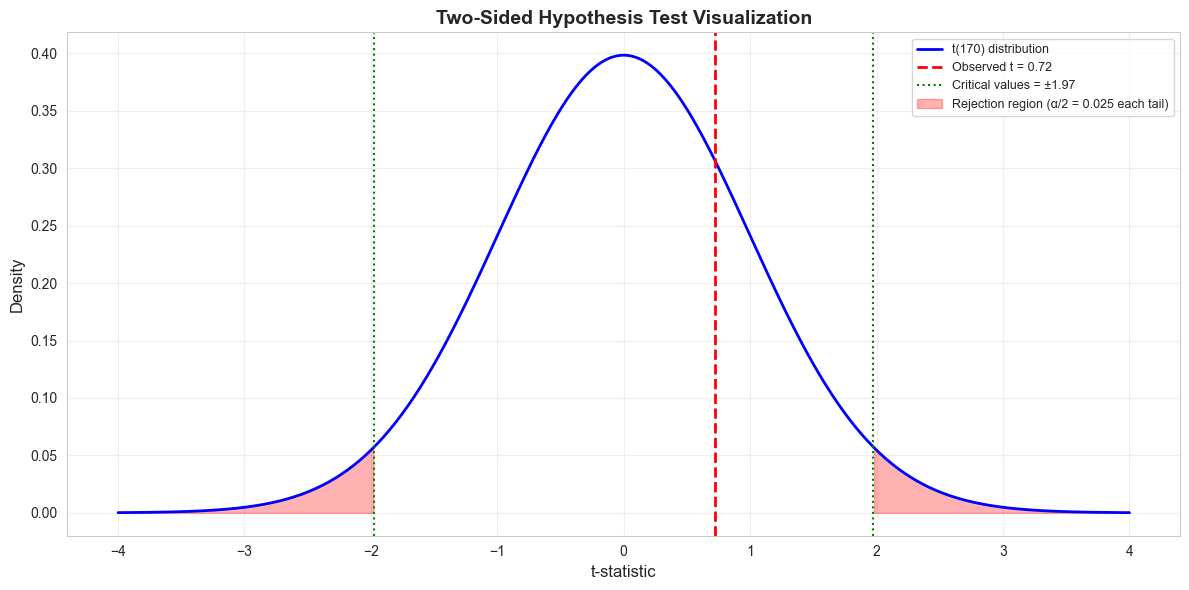


📊 Interpretation:
   Our t-statistic (0.72) falls INSIDE the critical region,
   so we do NOT reject H₀. The data are consistent with μ = $40,000.


In [7]:
# Visualize two-sided hypothesis test
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, n - 1)

# Plot the t-distribution
ax.plot(x, y, 'b-', linewidth=2, label=f't({n-1}) distribution')

# Mark the observed t-statistic
ax.axvline(x=t_stat, color='red', linewidth=2, linestyle='--',
           label=f'Observed t = {t_stat:.2f}')

# Mark critical values
ax.axvline(x=t_crit_95, color='green', linewidth=1.5, linestyle=':',
           label=f'Critical values = ±{t_crit_95:.2f}')
ax.axvline(x=-t_crit_95, color='green', linewidth=1.5, linestyle=':')

# Shade rejection regions (both tails)
x_reject_lower = x[x < -t_crit_95]
x_reject_upper = x[x > t_crit_95]
ax.fill_between(x_reject_lower, 0, stats.t.pdf(x_reject_lower, n-1),
                alpha=0.3, color='red', label='Rejection region (α/2 = 0.025 each tail)')
ax.fill_between(x_reject_upper, 0, stats.t.pdf(x_reject_upper, n-1),
                alpha=0.3, color='red')

ax.set_xlabel('t-statistic', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Two-Sided Hypothesis Test Visualization', fontsize=14, fontweight='bold')
ax.legend(fontsize=9, loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print(f"   Our t-statistic ({t_stat:.2f}) falls INSIDE the critical region,")
print(f"   so we do NOT reject H₀. The data are consistent with μ = ${mu0:,}.")

## 4.5 Hypothesis Test Examples

Let's apply hypothesis testing to three real-world economic questions.

### Example 1: Gasoline Prices

**Question:** Are gasoline prices in Yolo County different from the California state average?

- California average: $3.81/gallon
- Sample: 32 gas stations in Yolo County
- Test: H₀: μ = 3.81 vs Hₐ: μ ≠ 3.81

In [8]:
# Load and test gasoline price data
data_gasprice = pd.read_stata(GITHUB_DATA_URL + 'AED_GASPRICE.DTA')
price = data_gasprice['price']

mean_price = price.mean()
std_price = price.std(ddof=1)
n_price = len(price)
se_price = std_price / np.sqrt(n_price)

mu0_price = 3.81
t_stat_price = (mean_price - mu0_price) / se_price
p_value_price = 2 * (1 - stats.t.cdf(abs(t_stat_price), n_price - 1))

print("=" * 70)
print("EXAMPLE 1: GASOLINE PRICES")
print("=" * 70)
print(f"H₀: μ = ${mu0_price:.2f} (CA state average)")
print(f"Hₐ: μ ≠ ${mu0_price:.2f}")
print(f"\nSample size:       {n_price}")
print(f"Sample mean:      ${mean_price:.4f}")
print(f"Std error:        ${se_price:.4f}")
print(f"t-statistic:       {t_stat_price:.4f}")
print(f"p-value:           {p_value_price:.6f}")
print(f"\nDecision: p-value < 0.05 → {'REJECT H₀' if p_value_price < 0.05 else 'Do not reject H₀'}")
print(f"\nConclusion: Yolo County gas prices ARE {'significantly ' if p_value_price < 0.05 else 'NOT significantly '}different from CA average.")

EXAMPLE 1: GASOLINE PRICES
H₀: μ = $3.81 (CA state average)
Hₐ: μ ≠ $3.81

Sample size:       32
Sample mean:      $3.6697
Std error:        $0.0267
t-statistic:       -5.2577
p-value:           0.000010

Decision: p-value < 0.05 → REJECT H₀

Conclusion: Yolo County gas prices ARE significantly different from CA average.


### Example 2: Male Earnings

**Question:** Do 30-year-old men earn more than $50,000 on average?

- Claim: μ > $50,000 (set as alternative hypothesis)
- Sample: 191 men
- Test: H₀: μ ≤ 50,000 vs Hₐ: μ > 50,000 (one-sided, covered in section 4.6)

## Interpreting One-Sided vs Two-Sided Tests

**One-Sided Test Results: H₀: μ ≤ $40,000 vs Hₐ: μ > $40,000**
- t-statistic: 0.7237 (same as two-sided test)
- p-value (one-sided): 0.2351
- p-value (two-sided): 0.4703
- Critical value (one-sided, α=0.05): 1.6539
- Decision: Do NOT reject H₀

**Key differences from two-sided test:**

1. **p-value is exactly half:**
   - Two-sided p-value: 0.4703
   - One-sided p-value: 0.2351 = 0.4703/2
   - Why? We only count probability in ONE tail (upper tail)

2. **Critical value is smaller:**
   - Two-sided critical value: ±1.9740 (5% split across two tails)
   - One-sided critical value: 1.6539 (5% all in one tail)
   - One-sided tests reject H₀ more easily in the specified direction

3. **Directional claim:**
   - Two-sided: "μ is different from $40,000" (could be higher OR lower)
   - One-sided: "μ exceeds $40,000" (specifically higher)

**When to use one-sided tests?**

Use one-sided tests when:
- Theory or prior research specifies a direction
- Example: Testing if a new drug is better (not just different) than placebo
- Example: Testing if a policy increases (not just changes) income

**When NOT to use one-sided tests:**

Avoid one-sided tests when:
- You're genuinely interested in detecting differences in either direction
- You might want to detect unexpected effects
- The field convention is two-sided (economics typically uses two-sided)

**Warning about one-sided test abuse:**

Researchers sometimes use one-sided tests to get "significant" results when two-sided tests fail. This is questionable practice:
- If p (two-sided) = 0.08 → not significant at α = 0.05
- If p (one-sided) = 0.04 → significant at α = 0.05
- Switching to one-sided AFTER seeing the data is "p-hacking"
- The choice between one-sided and two-sided should be made BEFORE collecting data

**In our example:**
- Sample mean ($41,413) is above $40,000, consistent with Hₐ: μ > $40,000
- But p-value (0.2351) > 0.05, so still not significant
- The effect is too small relative to sampling variability
- We cannot conclude that mean earnings exceed $40,000

**Power consideration:**

One advantage of one-sided tests: greater statistical power in the specified direction
- If you're only interested in detecting μ > $40,000, the one-sided test is more powerful
- Trade-off: Cannot detect effects in the opposite direction

In [9]:
# Load and test male earnings data
data_male = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGSMALE.DTA')
earnings_male = data_male['earnings']

mean_male = earnings_male.mean()
std_male = earnings_male.std(ddof=1)
n_male = len(earnings_male)
se_male = std_male / np.sqrt(n_male)

mu0_male = 50000
t_stat_male = (mean_male - mu0_male) / se_male
p_value_male = 2 * (1 - stats.t.cdf(abs(t_stat_male), n_male - 1))  # Two-sided for now

print("=" * 70)
print("EXAMPLE 2: MALE EARNINGS (Two-sided test shown)")
print("=" * 70)
print(f"H₀: μ = ${mu0_male:,}")
print(f"Hₐ: μ ≠ ${mu0_male:,}")
print(f"\nSample size:       {n_male}")
print(f"Sample mean:      ${mean_male:,.2f}")
print(f"Std error:        ${se_male:,.2f}")
print(f"t-statistic:       {t_stat_male:.4f}")
print(f"p-value:           {p_value_male:.4f}")
print(f"\nDecision: p-value > 0.05 → Do not reject H₀")
print(f"\nNote: A one-sided test is more appropriate here (see section 4.6)")

EXAMPLE 2: MALE EARNINGS (Two-sided test shown)
H₀: μ = $50,000
Hₐ: μ ≠ $50,000

Sample size:       191
Sample mean:      $52,353.93
Std error:        $4,705.75
t-statistic:       0.5002
p-value:           0.6175

Decision: p-value > 0.05 → Do not reject H₀

Note: A one-sided test is more appropriate here (see section 4.6)


### Example 3: GDP Growth

**Question:** Did real GDP per capita grow at 2.0% per year on average from 1960-2020?

- Historical claim: 2.0% annual growth
- Sample: 241 year-to-year growth rates
- Test: H₀: μ = 2.0 vs Hₐ: μ ≠ 2.0

In [10]:
# Load and test GDP growth data
data_gdp = pd.read_stata(GITHUB_DATA_URL + 'AED_REALGDPPC.DTA')
growth = data_gdp['growth']

mean_growth = growth.mean()
std_growth = growth.std(ddof=1)
n_growth = len(growth)
se_growth = std_growth / np.sqrt(n_growth)

mu0_growth = 2.0
t_stat_growth = (mean_growth - mu0_growth) / se_growth
p_value_growth = 2 * (1 - stats.t.cdf(abs(t_stat_growth), n_growth - 1))

print("=" * 70)
print("EXAMPLE 3: REAL GDP PER CAPITA GROWTH")
print("=" * 70)
print(f"H₀: μ = {mu0_growth:.1f}%")
print(f"Hₐ: μ ≠ {mu0_growth:.1f}%")
print(f"\nSample size:       {n_growth}")
print(f"Sample mean:       {mean_growth:.4f}%")
print(f"Std error:         {se_growth:.4f}%")
print(f"t-statistic:       {t_stat_growth:.4f}")
print(f"p-value:           {p_value_growth:.4f}")
print(f"\nDecision: p-value > 0.05 → Do not reject H₀")
print(f"\nConclusion: The data are consistent with 2.0% average annual growth.")

EXAMPLE 3: REAL GDP PER CAPITA GROWTH
H₀: μ = 2.0%
Hₐ: μ ≠ 2.0%

Sample size:       245
Sample mean:       1.9905%
Std error:         0.1392%
t-statistic:       -0.0686
p-value:           0.9454

Decision: p-value > 0.05 → Do not reject H₀

Conclusion: The data are consistent with 2.0% average annual growth.


## Interpreting Inference for Proportions

**Proportion Results: 480 out of 921 voters intend to vote Democrat**
- Sample proportion: p̂ = 0.5212 (52.12%)
- Standard error: 0.0165
- 95% CI: [0.4889, 0.5534] or [48.89%, 55.34%]
- z-statistic (testing H₀: p = 0.50): 1.2851
- p-value: 0.1988
- Decision: Do NOT reject H₀

**What this tells us:**

We have a sample where 52.12% intend to vote Democrat. The question is: does this provide evidence that the population proportion differs from 50% (a tied race)?

**Understanding the confidence interval:**

The 95% CI [48.89%, 55.34%] suggests:
- We're 95% confident the true population proportion is in this range
- The interval INCLUDES 50%, indicating 50-50 is plausible
- The interval is fairly wide (6.45 percentage points), indicating some uncertainty

**Understanding the hypothesis test:**

Testing H₀: p = 0.50 (tied race) vs Hₐ: p ≠ 0.50 (one candidate ahead)
- z-statistic: 1.29 (only 1.29 standard errors above 50%)
- p-value: 0.1988 (about 20% chance of seeing this result if truly 50-50)
- Conclusion: We cannot reject the null hypothesis of a tied race

**Why use z-statistic (normal) instead of t-statistic?**

For proportions with large samples (n = 921):
- The sampling distribution of p̂ is approximately normal
- We know the exact standard error formula: √[p̂(1-p̂)/n]
- No need to estimate anything with t-distribution
- Rule of thumb: Use normal approximation when np ≥ 10 and n(1-p) ≥ 10
- Here: 921(0.52) = 479 and 921(0.48) = 442, both >> 10 ✓

**Practical interpretation for election forecasting:**

This sample shows 52% support for Democrats, but:
- This is NOT statistically significant evidence of a Democratic lead (p = 0.20)
- The confidence interval includes 50%, so the race could be tied
- Margin of error: ±3.2 percentage points (1.96 × 0.0165 = 0.032)
- To call the race, we'd want the CI to exclude 50% entirely

**How would a larger sample change things?**

If we had the same proportion (52%) but with 2,500 voters instead of 921:
- Standard error would shrink: √[0.52(0.48)/2500] = 0.010
- 95% CI would be narrower: [50.0%, 54.0%]
- z-statistic would be larger: (0.52 - 0.50)/0.010 = 2.00
- p-value would be smaller: 0.045 < 0.05 → significant!
- Conclusion: Same proportion, but with more data, we could detect the difference

**Key insight about proportions:**

Proportions are just means of binary (0/1) data:
- Each voter is coded as 1 (Democrat) or 0 (not Democrat)
- Sample proportion = sample mean of these 0/1 values
- All inference principles (SE, CI, hypothesis tests) apply identically

## 4.6 One-Sided Directional Hypothesis Tests

Sometimes we want to test a **directional** claim:
- "Does μ **exceed** a certain value?" (upper-tailed test)
- "Is μ **less than** a certain value?" (lower-tailed test)

**Structure:**
- **Upper-tailed test:** H₀: μ ≤ μ* vs Hₐ: μ > μ*
- **Lower-tailed test:** H₀: μ ≥ μ* vs Hₐ: μ < μ*

**Key difference from two-sided tests:**
- Rejection region is only in **one tail** of the distribution
- p-value calculation uses one tail instead of two
- For upper-tailed: p-value = Pr[T ≥ t]
- For lower-tailed: p-value = Pr[T ≤ t]

**Example:** Test whether mean earnings **exceed** $40,000.
- Claim to be tested: μ > 40,000 (set as Hₐ)
- Test: H₀: μ ≤ 40,000 vs Hₐ: μ > 40,000

In [11]:
# One-sided (upper-tailed) test: H0: μ ≤ $40,000 vs Ha: μ > $40,000
mu0 = 40000
t_stat = (mean_earnings - mu0) / se_earnings
p_value_upper = 1 - stats.t.cdf(t_stat, n - 1)  # Upper tail only
t_crit_upper = stats.t.ppf(0.95, n - 1)  # One-sided critical value

print("=" * 70)
print("ONE-SIDED HYPOTHESIS TEST (Upper-tailed)")
print("=" * 70)
print(f"H₀: μ ≤ ${mu0:,}")
print(f"Hₐ: μ > ${mu0:,} (the claim we're testing)")
print(f"Significance level α = 0.05")
print("\nTest Results:")
print(f"  t-statistic:       {t_stat:.4f}")
print(f"  p-value (upper):   {p_value_upper:.4f}")
print(f"  Critical value:    {t_crit_upper:.4f}")
print("\nDecision:")
print(f"  p-value approach:  {p_value_upper:.4f} > 0.05 → Do not reject H₀")
print(f"  Critical approach: {t_stat:.4f} < {t_crit_upper:.4f} → Do not reject H₀")
print("\nConclusion: We do not have sufficient evidence to support the claim")
print(f"that mean earnings exceed ${mu0:,}.")

ONE-SIDED HYPOTHESIS TEST (Upper-tailed)
H₀: μ ≤ $40,000
Hₐ: μ > $40,000 (the claim we're testing)
Significance level α = 0.05

Test Results:
  t-statistic:       0.7237
  p-value (upper):   0.2351
  Critical value:    1.6539

Decision:
  p-value approach:  0.2351 > 0.05 → Do not reject H₀
  Critical approach: 0.7237 < 1.6539 → Do not reject H₀

Conclusion: We do not have sufficient evidence to support the claim
that mean earnings exceed $40,000.


### Visualizing One-Sided Test

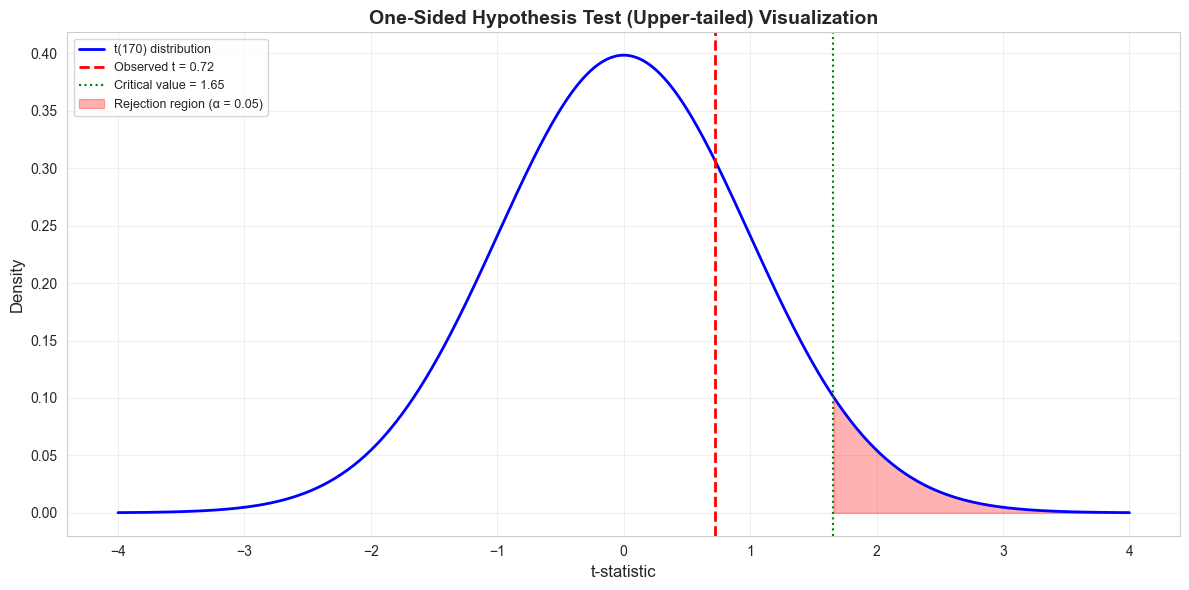


📊 Interpretation:
   For an upper-tailed test, we only reject H₀ if t is large and POSITIVE.
   Our t-statistic (0.72) is below the critical value, so we do not reject.


In [12]:
# Visualize one-sided hypothesis test
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, n - 1)

# Plot the t-distribution
ax.plot(x, y, 'b-', linewidth=2, label=f't({n-1}) distribution')

# Mark the observed t-statistic
ax.axvline(x=t_stat, color='red', linewidth=2, linestyle='--',
           label=f'Observed t = {t_stat:.2f}')

# Mark critical value (upper tail only)
ax.axvline(x=t_crit_upper, color='green', linewidth=1.5, linestyle=':',
           label=f'Critical value = {t_crit_upper:.2f}')

# Shade rejection region (upper tail only)
x_reject = x[x > t_crit_upper]
ax.fill_between(x_reject, 0, stats.t.pdf(x_reject, n-1),
                alpha=0.3, color='red', label='Rejection region (α = 0.05)')

ax.set_xlabel('t-statistic', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('One-Sided Hypothesis Test (Upper-tailed) Visualization',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print(f"   For an upper-tailed test, we only reject H₀ if t is large and POSITIVE.")
print(f"   Our t-statistic ({t_stat:.2f}) is below the critical value, so we do not reject.")

## 4.8 Proportions Data

The methods extend naturally to **proportions** (binary data).

**Example:** Survey data where respondents answer yes (1) or no (0).
- Sample proportion: $\hat{p} = \bar{x}$ = fraction of "yes" responses
- Standard error: se($\hat{p}$) = √[$\hat{p}$(1 - $\hat{p}$)/n]

**Confidence interval for population proportion p:**
$$\hat{p} \pm z_{\alpha/2} \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

**Note:** For proportions with large n, we use the **normal distribution** (z) instead of t.

**Example:** In a sample of 921 voters, 480 intend to vote Democrat. Is this different from 50%?

In [13]:
# Proportions example
n_total = 921
n_success = 480
p_hat = n_success / n_total
se_prop = np.sqrt(p_hat * (1 - p_hat) / n_total)

# 95% Confidence interval
z_crit = 1.96  # For 95% CI (normal approximation)
ci_lower_prop = p_hat - z_crit * se_prop
ci_upper_prop = p_hat + z_crit * se_prop

print("=" * 70)
print("INFERENCE FOR PROPORTIONS")
print("=" * 70)
print(f"Sample size:           {n_total}")
print(f"Number voting Democrat: {n_success}")
print(f"Sample proportion:     {p_hat:.4f} ({p_hat*100:.2f}%)")
print(f"Standard error:        {se_prop:.4f}")
print(f"95% CI:                [{ci_lower_prop:.4f}, {ci_upper_prop:.4f}]")
print(f"                        [{ci_lower_prop*100:.2f}%, {ci_upper_prop*100:.2f}%]")

# Hypothesis test: H0: p = 0.50
p0 = 0.50
se_under_h0 = np.sqrt(p0 * (1 - p0) / n_total)
z_stat = (p_hat - p0) / se_under_h0
p_value_prop = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"\nHypothesis Test: H₀: p = {p0:.2f} (50-50 split)")
print(f"  z-statistic:       {z_stat:.4f}")
print(f"  p-value:           {p_value_prop:.4f}")
print(f"  Decision:          {'Reject H₀' if abs(z_stat) > 1.96 else 'Do not reject H₀'}")
print(f"\nConclusion: The proportion is {'significantly' if abs(z_stat) > 1.96 else 'NOT significantly'} different from 50%.")

INFERENCE FOR PROPORTIONS
Sample size:           921
Number voting Democrat: 480
Sample proportion:     0.5212 (52.12%)
Standard error:        0.0165
95% CI:                [0.4889, 0.5534]
                        [48.89%, 55.34%]

Hypothesis Test: H₀: p = 0.50 (50-50 split)
  z-statistic:       1.2851
  p-value:           0.1988
  Decision:          Do not reject H₀

Conclusion: The proportion is NOT significantly different from 50%.


## 📚 Chapter Summary

**Key Takeaways:**

1. **Statistical inference** lets us extrapolate from sample statistics to population parameters with quantified uncertainty.

2. **Standard error** se($\bar{x}$) = s/√n measures the precision of the sample mean as an estimate of the population mean.

3. **t-distribution** is used (instead of normal) when we estimate the population standard deviation from the sample.
   - Fatter tails than normal (accounts for extra uncertainty)
   - Converges to normal as n increases

4. **Confidence intervals** provide a range of plausible values:
   - Formula: estimate ± critical value × standard error
   - 95% CI: $\bar{x} \pm t_{n-1, 0.025} \times$ se($\bar{x}$) ≈ $\bar{x} \pm 2 \times$ se($\bar{x}$)
   - Interpretation: "We are 95% confident μ lies in this interval"

5. **Hypothesis tests** evaluate specific claims about parameters:
   - Set up H₀ (null) and Hₐ (alternative)
   - Calculate t-statistic = (estimate - hypothesized value) / standard error
   - Make decision using p-value or critical value approach

6. **Two-sided tests** (H₀: μ = μ* vs Hₐ: μ ≠ μ*):
   - Rejection region in both tails
   - p-value = 2 × Pr[T ≥ |t|]

7. **One-sided tests** (H₀: μ ≤ μ* vs Hₐ: μ > μ*, or vice versa):
   - Rejection region in one tail only
   - Use when testing a directional claim

8. **p-value interpretation**:
   - Probability of observing data at least as extreme as ours, assuming H₀ is true
   - Small p-value (< α) → reject H₀
   - Common significance level: α = 0.05

9. **Methods generalize** to other parameters (regression coefficients, differences in means, etc.) and to proportions data.

**Statistical Concepts Covered:**
- Standard error and sampling distribution
- t-distribution vs normal distribution
- Confidence intervals (90%, 95%, 99%)
- Hypothesis testing (two-sided and one-sided)
- p-values and critical values
- Type I error and significance level
- Inference for proportions

**Python Tools Used:**
- `scipy.stats.t`: t-distribution (pdf, cdf, ppf)
- `scipy.stats.norm`: Normal distribution (for proportions)
- `pandas`: Data manipulation
- `matplotlib`: Visualization of hypothesis tests

**Next Steps:**
- **Chapter 5**: Bivariate data summary (relationships between two variables)
- **Chapter 6**: Least squares estimator (regression foundation)
- **Chapter 7**: Inference for regression coefficients

---

**Congratulations!** 🎉 You now understand the foundations of statistical inference:
- How to quantify uncertainty using confidence intervals
- How to test claims about population parameters
- The difference between statistical and practical significance
- When to use one-sided vs two-sided tests

These tools are fundamental to all empirical research in economics and beyond!